In [1]:
# Simple Example to demo RESNET-50
# Based on: https://keras.io/applications/#resnet50 

# Import model and image utilities
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# For displaying results inline in notebook
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load the model
model = ResNet50(weights='imagenet')

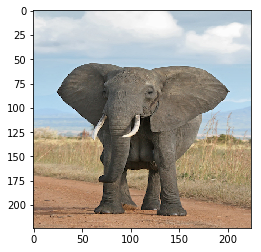

In [3]:
# Load an image and resize to 224x224
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

In [18]:
# Turn it into a matrix (224x224x3)
x = image.img_to_array(img)
# Add a dimension to make it (1x224x224x3)
x = np.expand_dims(x, axis=0)
# This remaps the pixel values to a negative<->positive range
x = preprocess_input(x)
# Here let's look at pixel (200,200)
x[0][200][200]

array([ -9.93900299,   3.22100067,  26.31999969], dtype=float32)

In [21]:
# Now let's make a prediction
preds = model.predict(x)
# Decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.9184854), ('n01871265', 'tusker', 0.066342175), ('n02504013', 'Indian_elephant', 0.01471622)]


In [22]:
# Ok let's try a base64 encoded image
from io import BytesIO
from PIL import Image
import base64

# Data (this is an MNIST digit)
data = 'iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAYAAACtWK6eAAAVoUlEQVR4Xu1debRW0xt+U9Eg3a7UVTTRIFldDZRUNCnEMiuRyFRCSaYGZChaKd2QqQGROQ0q0qBhXVNKN6Wu6jYpTbqRjL/17OX+0B3O952zz7DPft617rp/nHP2Oft59/Pt4Z2KichfQiECRKBABIqRIBwZRKBwBEgQjg4iUAQCJAiHBxEgQTgGiIA7BDiDuMONT1mCAAliiaLZTXcIkCDucONTliBAgliiaHbTHQIkiDvc+JQlCJAgliia3XSHAAniDjc+ZQkCJIglimY33SFAgrjDjU9ZggAJYomi2U13CJAg7nDjU5YgQIJYomh20x0CJIg73PiUJQiQIJYomt10hwAJ4g43PmUJAiSIJYpmN90hQIK4w41PWYIACWKJotlNdwiQIO5w41OWIECCWKJodtMdAiSIO9z4lCUIkCARU3T58uWlcuXKUqNGDalXr54cddRRUqxYMfn999/ll19+kT///FN98WGHHSalS5eWEiVKqOt//fWX7N69W6ZNmyYbN26MWK/M/RwSJEDdnXzyydKiRQupWLGilClTRipVqqTIkJaWpv7jr1SpUp6+CERZsGCB3H777bJixQpPbfFhERLEp1GAX/hTTjlF0tPTpXXr1tKmTRupVq2a+rUPQn799Vfp0aOHTJ48OYjXxfYdJIgG1WLQH3HEEYoMrVq1kpYtW0rTpk0lNTVVSpYsqeEN7prAcuzcc8+V2bNnu2uAT3EGcTsGjj/+eOnUqZM0bNhQ/TVu3Njz8sjttxT13N69e+XEE0+UXbt2+dF87NvkDJKkiuvXry8jRoyQ9u3bqw2yCTJ48GAZOnSoCZ8auW8kQRJUSfHixeXee++VIUOGGEOMvK5lZ2erWYSSPAIkSAKYYfk0ZswYad68eQJ3R++WP/74wzhSRwVFEqQITcAG8eijj0rPnj3VJtxkCer0zGSMCvp2EqQAVLCc6ty5s4wePVodzZouOM1CnyjJI0CCHIIZjmqffvppadasWWA2i+TVltwTmzdvFpy6UZJHgAT5GzP8wvbt21ceeeQROfzww5NHMsJP4NTtrrvuivAXRvfTSBARqVmzpjz33HPSrl276GrK5ZfBf6tu3bqSk5PjsgW7H7OaIHAHuf7662X48OFSoUKFWI6Em266SZGf4g4BawkCb1kMnLZt2yrP2LgJnBYfeugheeCBB+LWtUD7Yx1BsNeAEx/W5XAtj6Ns2LBBbr75ZvpgaVCuVQQ59dRT1azRpEkTDdD50wSMejt37pTt27erv3379smePXtk//79Bb4QbvP4w33btm2TL7/8UmbOnOnPx1nYqjUEufLKK2XixImhn1Bh6YNf+GXLlsm3334r69evVwFO33//vSLEDz/8ICAJJRoIWEGQLl26yCuvvBL4XgNkwGDPysqShQsXytKlS2XRokWKCIjXoEQfgdgTBPEQ7777bmAzx88//yyffvqpIkRmZqZ88sknkpubG+pIwAkdgrZwMAHCwnlxyZIlAld4StEIxJogiNd466231Brdb8EeYNiwYTJ27Fi1H4iCHHfcccrwecUVV+TzJYP7yfLly2X+/PnqD4QmYfJrLbYECYocGGjvv/++igGPkjEO/X/55Zfl6KOPToireYRBPPu6devko48+Uv9t3w/FkiBwNJwyZYrK+uGngBC33HKLOk6N0kA644wzZO7cuZ4jHHFwgOXimjVr1GHC1KlTZevWrX5CGrm2Y0cQWMbHjRvnq/cqNt/jx49XvltRWU7ljSz8KKxevdoXL2QbM6bEiiBYVsyYMcNXL1wsO7CciqqtAbErzz//vK+/xL/99ptcc8018vrrr/v6nig0HhuCpKSkqGUA/vshBw4cUPEh2PQWZrTz473JtonlXocOHZJ9zNX9cGVBCHKcJTYEgaL88jv6+uuvlVPjZ599FvmxgOwlSDcUlFx11VWxzr0VC4IgHBabR90DA7PGk08+qWYN2DeiLlWrVhUERwUpOP1CitS1a9cG+drA3hULgmCzPHLkSK2gwUYAV3EY+6IsZcuWlfPPP1969eqlEtaFEXs+atQodWARRzGeIOXKlVO+TDrjOeDQeOuttwo2o1EU5ONCSHD37t1V5sQqVaqE+pkHDx70fKQcageKeLnxBEEo6eOPP64NX5xQPfXUU9ra09UQZoZatWpJt27d1B+iIKOUiCGMmUsXtkW1YzxB4FeEgaNDYPR79tlndTSlrQ0Q4bLLLpOOHTvK2Wefra1d3Q2RILoR1dAeMnXAdVxHRGDUyNGgQQN57LHHVP7fKM0UhakNiS6iuiT1MtSMnkF69+4tGRkZXvqvno0SObC/wP4HcfKmZFeBhV3Hj5RnRfrQgNEEgSv5mWee6QkWGP/uuOMOT23oehhLxWeeeSYwQ5+u78YRO46Y4yjGEgRn7ytXrvS0/Pjxxx+levXqgv9hCmqIwBAJe4tuW04Q/YKbPxJ7x1GMJQjS+Q8cONCTTnBahVOrMKV27drq1Oycc84JxYbhte/Iu1WnTh3ZtGmT16Yi+byxBMHsgZp/bgXu6Y0aNQqtjh823nAsxBE1kmSbKtgHIlVrXMVIgmBDiF8uL+XNYCGHsS0MycvkiLqFpm5usTFH5nuvs3gY+CfzTiMJgl9flEX2In369NFyApbMN8BWgBMzHN+aPGvAaxp5t+bMmZNM942810iC4FfXawQfEhgEWU8cFW8Rp3H66acbOVDw0TDKPvjggyqU1xYxkiBQDqZ4LxKk5RdJEyZMmBBJfyUY92BsxSYbf0hSlyeY5eCtix+Szz//XGbNmuUFciOfJUF8VBuMflin9+/fP/QTKiSkAwHglr5q1SqVqG7evHmKHHG0gOtSKwmiC8lD2oHh7KWXXgrF6IdffcSFvP322yr/FQyqSFZHSR4BEiR5zByfaNGihYrXRl6qIGX37t0ybdo09W5soEEUijcESBBv+P3naZyuwfCIU6qg/Khw3P3BBx8oUiCXFUhC0YcACaIJSwRswY8KG/IgBEumJ554QuUc3rFjh+dDiyC+2cR3kCAatIY66hio8A/zWxC9h/BiGOi4hPIbbRESxCPG1113nUrsEITh76uvvlJOjagBQgkGARLEJc5IlgBXeVSr8ttdBNlVkBgBaY1YNsGlwlw+Zi1BkOwAm1s3Ah+uF154wZOzZKLvRS4uxKvguJYSPALWEgR5ri699NKkSYJKVbCKIxeXn4LTKWzCcSKGGYQSDgLWEgRwJ0uSCy64QN555x1PQVqJqPmLL74QOFOiIhUlXASsJkgyJIFlfMWKFb5G/MG/DLMGHAJNyOQY7tAN5u3GEgTevLo2x1jCXH755TJ9+vQCUYdPFSpVXXjhhb5pBXHd2PDb4ELuG4g+NGwsQeB4p9OVA/ElSDUK/6lDBTEcfkbN4bAA5KC/lA8j3GOTxhIESxF4yeoULHH69eunYsTzjHDp6emyePFiX+ocwosWiRpQRsCr+75OHNjWPwgYS5Bq1aqp0mClSpXSqk8MVMwiyE2FtlG22Uvse2EfB58pLOtQKo0SXQSMJQggvfHGG1W5NT8ElV+xL+jatav25mHTQF0NxGJQoo2A0QQBtFieDBo0KNoo//11OFhA7l+UCmCQkhEqM9cX69/wwmYQxYzs//7G3NxctWybNGmSGSODX6kQMH4GydMjsmzA3TyKghJuKFkAOwrFLARiQxDAHkWSoLY4KsJGrVy0WcM0vK+NFUGiRpIpU6ZIly5deIQb3vj2/ObYESQqJIEfFQreIMCJYi4CsSQI1OG39bsolSNbPBLEwU5DMRuB2BIEakFKfuSlClJgaISN47XXXgvytXyXTwjEmiDAbPDgwSoSL6hMinBVRymDXbt2+aQyNhskArEnCMC86KKLlPtISkpKINjC6fDNN98UlJPGES/FXASsIAjUg4Kf8Jr1w6+qMPXDcg739XvuuYc2EEM5Yg1BoB/MIEjPc9555wWqLrjSo1AOPHcZCBUo9J5fZhVBgBaCrN544w255JJLPIOXbAM5OTkqlBbpQenenix64dxvHUGOPfZYWb58uRxzzDHhIC4iH374oQwYMECQ54oSbQSsIghOsiZPnizITBK2IGsJCuog/pwnXmFro/D3W0UQBCghyXNQR76JqB11O3AU/eKLL9IFPhHAAr7HGoIgAnHZsmW+ZiVxqzvsR2A/ue+++9TyixIdBKwgCDbmM2fOVAa8KAuIgkhGBFRhn0QJHwErCAI7BDIUmiKINkSUZEZGhvz000+mfHYsvzP2BDnttNPk448/FiSbNk1Wrlyp8vIysUN4mos1QVCSYOHChdKwYcPwEPb4Ziy7kLQOy64tW7Z4bI2PJ4tArAmCuh34BdYhKDuwf//+0Db5e/fuleHDh8uYMWO47NKh0ATbiC1BOnfurKq8lixZMkEoCr8Nv+KIL8EvOcJ6YQ2vXLmy53bdNICTuCFDhihrPMV/BGJJEFjLUfi+SpUqWhCcOHGiXHvttf9vCwnlevbsqbKU1KlTJ3C7CgiLfRUKhmZlZWnpIxspGIHYEQTVZRGsdPHFF2vROdzVW7duLXv27MnXHo6PYZVHvEnt2rW1vC+ZRmCNx2wGIyN9u5JBLvF7Y0eQq6++WlvuKeSyQiUqpB8tSkBKzCj333+/tlkrURWCGK+++qpKvE1P4URRS/y+WBGkfv36kpmZKUceeWTiCBRxJ2YG+EolKjg1Q6ZH7FeCqpOe923ffPONIilLtSWqrcTuiw1BUBJt3rx50rx588R67nDXggULpH379q78o0466SQV+4FIxiAFGVRAUGS+Z2pTPcjHhiAjRoyQO++8Uwsq2G80bdpUsrOzXbcHh0gEZuFoFjNbkAI3ehwq0F3FO+qxIAhqB7733ntaTpOwpkcmREQe6hDMbDgahsduamqqjiYTagN2m9tuu8237PcJfUQMbjKeIBUqVJB169ZpG3xItgC3eN2SlpamZhMcIgTlbg+yjx07VsXE06fLnUaNJ4hOR8SNGzdKo0aNBMVt/JKzzjpLZTsJ8lgYSbOx5IKRkZIcAsYTBKc39erVS67XBdyNxApYqiHzid9SvHhx6dWrl/LYDSr0F0uu7t27q4AxSuIIGE8QKF6HOwlOnQYOHJg4chrurFixojz88MOqUlYQyy7UXcQSD2HHlMQQMJogGFR5xTYT627Bd2Hp0bJly9DW6U2aNFGVpxo3buylGwk9ix8UpEaFXxnFGQHrCYJE061atQo9sVueNR6zGHzJ/BTYSHCyVlDJaz/fa2LbRhMEgHv1QYLDX5TKt8FLGIY+/MrD18svwZ4LHs+zZs3y6xWxaNd6gmDDrGOZpnM0YOnYtm1blRaoRo0aOpv+T1s7duwQWP39PLXz7eMDath6ggSxOXarS/h2jR49Wp0++fWd8DWDzxmlYARIkGKAILoCYsCnC5t4P46EDxw4INWrVxfk56LkR4AEiThB8lSGQYxNdZs2bbSP47vvvlsl16aQIPkQ8Gvp4sdgw35p6NChggGtcwO/atWqQMtC+IGNX21yBjFkBvn3AEC0JE7eqlatqmVcoI5JmTJlBDYSyn8RIEEMJAhUWKlSJZkwYYJ06tRJy5iGjxhiYCgkyH8QMGmJdejgxZJr2LBhKg7Gaz9Q7BQhwxQSJDYEyesIcn+NHDnSE0nWrl2rMrRQSJDYEQQdQuKGrl27uh7f2IeUKFHC9fNxfZB7EEP3IIcOSOxFkMHei4AgIArlHwRIkJgQpHz58oL0pF7E6z7Gy7uj+iwJEgOCwMIO93V4JXsREiQ/eiSI4QRBLAnIAUu7VyFBSJB8CJg6KPDdiOkYNWqUtiR1pmLh9YehqOc5gxg4g/jl5UuCcAYxfgZBxaxJkyZJ3bp1tf5wIiYGhkcK7SBG2kGQgA4GQdQGKV26tPZxvGnTJkElYAoJYhRB0tPTlb8VElPXqlXLt/GLMN8BAwb41r6pDXMPErE9COwZ7dq1U3l9O3TooM1jt6gBijojWLLl5OSYOo59+27rCQIbws6dO30DOJGGMUt07NhRzRTITq8jz1ci7827B+UaELFI4SY9HwJw8cYvdVCxEKhdAkIgBxaq7wY1SxQ0+JERBuUSGJNe+E+D9TMIoBk3bpyyKXgVRPnhD7MSPGPxhzqJNWvWVBF72ASXK1dOUOMw7CNV5APr1q2bTJ8+3Wu3Y/08CfK3epEhfvHixYLTHJR7RnK1ohz3QAQM9LJly6poPCSjPuGEExQZ8qpL6QyL1TkK16xZo5Zz69ev19lsLNsyniAYxFEdiFEcMfD4xcxRUFHSKH5v2N9kPEE2b94cyElP2IrS8f6MjAxVVMdrNkod32JKG8YTBOf3/fv3NwXvUL4ThEDOX4TVUpJDwHiCYOO7evVqX6zLyUEZzbu3bdsmPXr0kNmzZ0fzAyP+VcYTBPjecMMNqmoT5R8EMGuMHz9e+vbtK/v27SM0LhGIBUHQdy61/hkBSErdr18/FadO8YZAbAgCGLAJ7d27tzdEDH8ateLht/Xdd98Z3pNofH6sCILjXhi+dCVTi4aKEvuKvIq2ffr0SewB3pUQArEiCHqckpIiS5YsUXUvbBEUMoUnLq3i+jUeO4IAIpxsgSS6ctfqh91biwcPHpTMzEzBcmru3LmyaNEi2ja8QVro07EkCHoLZ0CQJM/twyf8Amt2w4YNMmfOHJkxY4YiRm5ubmDvtvlFsSUIlGry8S9mCcwMqCGI2u1ZWVk2j9PQ+h5rggDVQYMGCcqMhe09m4iGt2/fLlOnTuUskQhYAd0Te4IARwQjIT2O7kQHbnSE6D2UPdu1a5ds3bpV4EWMv6VLl8r8+fPdNMlnfETACoLk4YdQ1mbNmim3dMRnIFYDNcl1ewNjf4DZAJGK2dnZanm0ZcsW5UoP50rYKJgD18dRrbFpqwhyKG7IDpKWlqY29A0aNJDU1FSV4RyDF3XEnQTxIDhWhg0Cgx4+YSADCmJidohaeWmn/vB6fgSsJggHBBFwQoAEcUKI161GgASxWv3svBMCJIgTQrxuNQIkiNXqZ+edECBBnBDidasRIEGsVj8774QACeKEEK9bjQAJYrX62XknBEgQJ4R43WoESBCr1c/OOyFAgjghxOtWI0CCWK1+dt4JARLECSFetxoBEsRq9bPzTgiQIE4I8brVCJAgVqufnXdCgARxQojXrUaABLFa/ey8EwIkiBNCvG41AiSI1epn550QIEGcEOJ1qxEgQaxWPzvvhAAJ4oQQr1uNAAlitfrZeScESBAnhHjdagRIEKvVz847IUCCOCHE61YjQIJYrX523gkBEsQJIV63GgESxGr1s/NOCJAgTgjxutUIkCBWq5+dd0KABHFCiNetRoAEsVr97LwTAiSIE0K8bjUCJIjV6mfnnRAgQZwQ4nWrEfgftL1gebdxbqgAAAAASUVORK5CYII='

# Decode into an image
img = Image.open(BytesIO(base64.b64decode(data)))
# Resize to 224x224 and make sure it's RGB
img = img.resize((224,224))
img = img.convert("RGB")

In [23]:
# Turn it into a matrix (224x224x3)
x = image.img_to_array(img)
# Add a dimension to make it (1x224x224x3)
x = np.expand_dims(x, axis=0)
# This remaps the pixel values to a negative<->positive range
x = preprocess_input(x)
# Here let's look at pixel (200,200)
x[0][200][200]

array([-103.93900299, -116.77899933, -123.68000031], dtype=float32)

In [24]:
# Double check shape
x.shape

(1, 224, 224, 3)

In [36]:
# Get a prediction
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
preds = decode_predictions(preds, top=3)[0]
preds

[('n03476684', 'hair_slide', 0.088327885),
 ('n11939491', 'daisy', 0.061741948),
 ('n03065424', 'coil', 0.057448681)]

In [37]:
# Testing out converting to something that will work with flask jsonify
data = []
for pred in preds:
    data.append({'id': pred[0], 'term': pred[1], 'score': float(pred[2])})

In [38]:
data

[{'id': 'n03476684', 'score': 0.08832788467407227, 'term': 'hair_slide'},
 {'id': 'n11939491', 'score': 0.06174194812774658, 'term': 'daisy'},
 {'id': 'n03065424', 'score': 0.05744868144392967, 'term': 'coil'}]